## Simple Data Science Case: HR Analytics, Chrun Rate
https://www.kaggle.com/datasets/vjchoudhary7/hr-analytics-case-study/code

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import os

In [2]:
os.listdir("../data/HR_Analytics")

['out_time.csv',
 'data_dictionary.xlsx',
 'employee_survey_data.csv',
 'manager_survey_data.csv',
 'in_time.csv',
 'general_data.csv']

## Load and Join data

In [3]:
df_emplo = pd.read_csv('../data/HR_Analytics/employee_survey_data.csv', index_col='EmployeeID')
df_emplo.head()

,EnvironmentSatisfaction,JobSatisfaction,WorkLifeBalance
EmployeeID,,,
1,3.0,4.0,2.0
2,3.0,2.0,4.0
3,2.0,2.0,1.0
4,4.0,4.0,3.0
5,4.0,1.0,3.0


In [4]:
df_gen = pd.read_csv('../data/HR_Analytics/general_data.csv', index_col='EmployeeID')
df_gen.head()

,Age,Attrition,BusinessTravel,Department,DistanceFromHome,Education,EducationField,EmployeeCount,Gender,JobLevel,...,NumCompaniesWorked,Over18,PercentSalaryHike,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager
EmployeeID,,,,,,,,,,,,,,,,,,,,,
1,51,No,Travel_Rarely,Sales,6,2,Life Sciences,1,Female,1,...,1.0,Y,11,8,0,1.0,6,1,0,0
2,31,Yes,Travel_Frequently,Research & Development,10,1,Life Sciences,1,Female,1,...,0.0,Y,23,8,1,6.0,3,5,1,4
3,32,No,Travel_Frequently,Research & Development,17,4,Other,1,Male,4,...,1.0,Y,15,8,3,5.0,2,5,0,3
4,38,No,Non-Travel,Research & Development,2,5,Life Sciences,1,Male,3,...,3.0,Y,11,8,3,13.0,5,8,7,5
5,32,No,Travel_Rarely,Research & Development,10,1,Medical,1,Male,1,...,4.0,Y,12,8,2,9.0,2,6,0,4


In [5]:
df_gen.columns

Index(['Age', 'Attrition', 'BusinessTravel', 'Department', 'DistanceFromHome',
       'Education', 'EducationField', 'EmployeeCount', 'Gender', 'JobLevel',
       'JobRole', 'MaritalStatus', 'MonthlyIncome', 'NumCompaniesWorked',
       'Over18', 'PercentSalaryHike', 'StandardHours', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'YearsAtCompany',
       'YearsSinceLastPromotion', 'YearsWithCurrManager'],
      dtype='object')

In [6]:
df_manag = pd.read_csv('../data/HR_Analytics/manager_survey_data.csv', index_col='EmployeeID')
df_manag.head()

,JobInvolvement,PerformanceRating
EmployeeID,,
1,3,3
2,2,4
3,3,3
4,2,3
5,3,3


In [7]:
df = pd.merge(left=df_gen, right=df_emplo, on='EmployeeID', how='left')
df

,Age,Attrition,BusinessTravel,Department,DistanceFromHome,Education,EducationField,EmployeeCount,Gender,JobLevel,...,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager,EnvironmentSatisfaction,JobSatisfaction,WorkLifeBalance
EmployeeID,,,,,,,,,,,,,,,,,,,,,
1,51,No,Travel_Rarely,Sales,6,2,Life Sciences,1,Female,1,...,8,0,1.0,6,1,0,0,3.0,4.0,2.0
2,31,Yes,Travel_Frequently,Research & Development,10,1,Life Sciences,1,Female,1,...,8,1,6.0,3,5,1,4,3.0,2.0,4.0
3,32,No,Travel_Frequently,Research & Development,17,4,Other,1,Male,4,...,8,3,5.0,2,5,0,3,2.0,2.0,1.0
4,38,No,Non-Travel,Research & Development,2,5,Life Sciences,1,Male,3,...,8,3,13.0,5,8,7,5,4.0,4.0,3.0
5,32,No,Travel_Rarely,Research & Development,10,1,Medical,1,Male,1,...,8,2,9.0,2,6,0,4,4.0,1.0,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4406,42,No,Travel_Rarely,Research & Development,5,4,Medical,1,Female,1,...,8,1,10.0,5,3,0,2,4.0,1.0,3.0
4407,29,No,Travel_Rarely,Research & Development,2,4,Medical,1,Male,1,...,8,0,10.0,2,3,0,2,4.0,4.0,3.0
4408,25,No,Travel_Rarely,Research & Development,25,2,Life Sciences,1,Male,2,...,8,0,5.0,4,4,1,2,1.0,3.0,3.0


In [8]:
df = pd.merge(left=df, right=df_manag, on='EmployeeID', how='left')
df

,Age,Attrition,BusinessTravel,Department,DistanceFromHome,Education,EducationField,EmployeeCount,Gender,JobLevel,...,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager,EnvironmentSatisfaction,JobSatisfaction,WorkLifeBalance,JobInvolvement,PerformanceRating
EmployeeID,,,,,,,,,,,,,,,,,,,,,
1,51,No,Travel_Rarely,Sales,6,2,Life Sciences,1,Female,1,...,1.0,6,1,0,0,3.0,4.0,2.0,3,3
2,31,Yes,Travel_Frequently,Research & Development,10,1,Life Sciences,1,Female,1,...,6.0,3,5,1,4,3.0,2.0,4.0,2,4
3,32,No,Travel_Frequently,Research & Development,17,4,Other,1,Male,4,...,5.0,2,5,0,3,2.0,2.0,1.0,3,3
4,38,No,Non-Travel,Research & Development,2,5,Life Sciences,1,Male,3,...,13.0,5,8,7,5,4.0,4.0,3.0,2,3
5,32,No,Travel_Rarely,Research & Development,10,1,Medical,1,Male,1,...,9.0,2,6,0,4,4.0,1.0,3.0,3,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4406,42,No,Travel_Rarely,Research & Development,5,4,Medical,1,Female,1,...,10.0,5,3,0,2,4.0,1.0,3.0,3,3
4407,29,No,Travel_Rarely,Research & Development,2,4,Medical,1,Male,1,...,10.0,2,3,0,2,4.0,4.0,3.0,2,3
4408,25,No,Travel_Rarely,Research & Development,25,2,Life Sciences,1,Male,2,...,5.0,4,4,1,2,1.0,3.0,3.0,3,4


## EDA

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4410 entries, 1 to 4410
Data columns (total 28 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Age                      4410 non-null   int64  
 1   Attrition                4410 non-null   object 
 2   BusinessTravel           4410 non-null   object 
 3   Department               4410 non-null   object 
 4   DistanceFromHome         4410 non-null   int64  
 5   Education                4410 non-null   int64  
 6   EducationField           4410 non-null   object 
 7   EmployeeCount            4410 non-null   int64  
 8   Gender                   4410 non-null   object 
 9   JobLevel                 4410 non-null   int64  
 10  JobRole                  4410 non-null   object 
 11  MaritalStatus            4410 non-null   object 
 12  MonthlyIncome            4410 non-null   int64  
 13  NumCompaniesWorked       4391 non-null   float64
 14  Over18                  

In [10]:
df.describe()

,Age,DistanceFromHome,Education,EmployeeCount,JobLevel,MonthlyIncome,NumCompaniesWorked,PercentSalaryHike,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager,EnvironmentSatisfaction,JobSatisfaction,WorkLifeBalance,JobInvolvement,PerformanceRating
count,4410.000000,4410.000000,4410.000000,4410.0,4410.000000,4410.000000,4391.000000,4410.000000,4410.0,4410.000000,4401.000000,4410.000000,4410.000000,4410.000000,4410.000000,4385.000000,4390.000000,4372.000000,4410.000000,4410.000000
mean,36.923810,9.192517,2.912925,1.0,2.063946,65029.312925,2.694830,15.209524,8.0,0.793878,11.279936,2.799320,7.008163,2.187755,4.123129,2.723603,2.728246,2.761436,2.729932,3.153741
std,9.133301,8.105026,1.023933,0.0,1.106689,47068.888559,2.498887,3.659108,0.0,0.851883,7.782222,1.288978,6.125135,3.221699,3.567327,1.092756,1.101253,0.706245,0.711400,0.360742
min,18.000000,1.000000,1.000000,1.0,1.000000,10090.000000,0.000000,11.000000,8.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,3.000000
25%,30.000000,2.000000,2.000000,1.0,1.000000,29110.000000,1.000000,12.000000,8.0,0.000000,6.000000,2.000000,3.000000,0.000000,2.000000,2.000000,2.000000,2.000000,2.000000,3.000000
50%,36.000000,7.000000,3.000000,1.0,2.000000,49190.000000,2.000000,14.000000,8.0,1.000000,10.000000,3.000000,5.000000,1.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000
75%,43.000000,14.000000,4.000000,1.0,3.000000,83800.000000,4.000000,18.000000,8.0,1.000000,15.000000,3.000000,9.000000,3.000000,7.000000,4.000000,4.000000,3.000000,3.000000,3.000000
max,60.000000,29.000000,5.000000,1.0,5.000000,199990.000000,9.000000,25.000000,8.0,3.000000,40.000000,6.000000,40.000000,15.000000,17.000000,4.000000,4.000000,4.000000,4.000000,4.000000


In [11]:
df.describe(include='object')

,Attrition,BusinessTravel,Department,EducationField,Gender,JobRole,MaritalStatus,Over18
count,4410,4410,4410,4410,4410,4410,4410,4410
unique,2,3,3,6,2,9,3,1
top,No,Travel_Rarely,Research & Development,Life Sciences,Male,Sales Executive,Married,Y
freq,3699,3129,2883,1818,2646,978,2019,4410


In [12]:
df.isna().sum()

Age                         0
Attrition                   0
BusinessTravel              0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
Gender                      0
JobLevel                    0
JobRole                     0
MaritalStatus               0
MonthlyIncome               0
NumCompaniesWorked         19
Over18                      0
PercentSalaryHike           0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           9
TrainingTimesLastYear       0
YearsAtCompany              0
YearsSinceLastPromotion     0
YearsWithCurrManager        0
EnvironmentSatisfaction    25
JobSatisfaction            20
WorkLifeBalance            38
JobInvolvement              0
PerformanceRating           0
dtype: int64

<Axes: xlabel='Attrition', ylabel='count'>

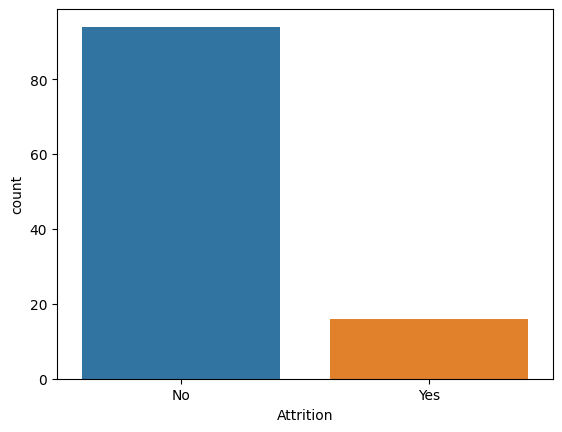

In [13]:
# How many of those with missing data are employees with positive attrition (i.e. they leave)?
df[df.isna().any(axis=1)]
sns.countplot(x='Attrition', data=df[df.isna().any(axis=1)])

In [14]:
df = df.dropna() 

In [15]:
df.reset_index().duplicated().sum()

0

<Axes: >

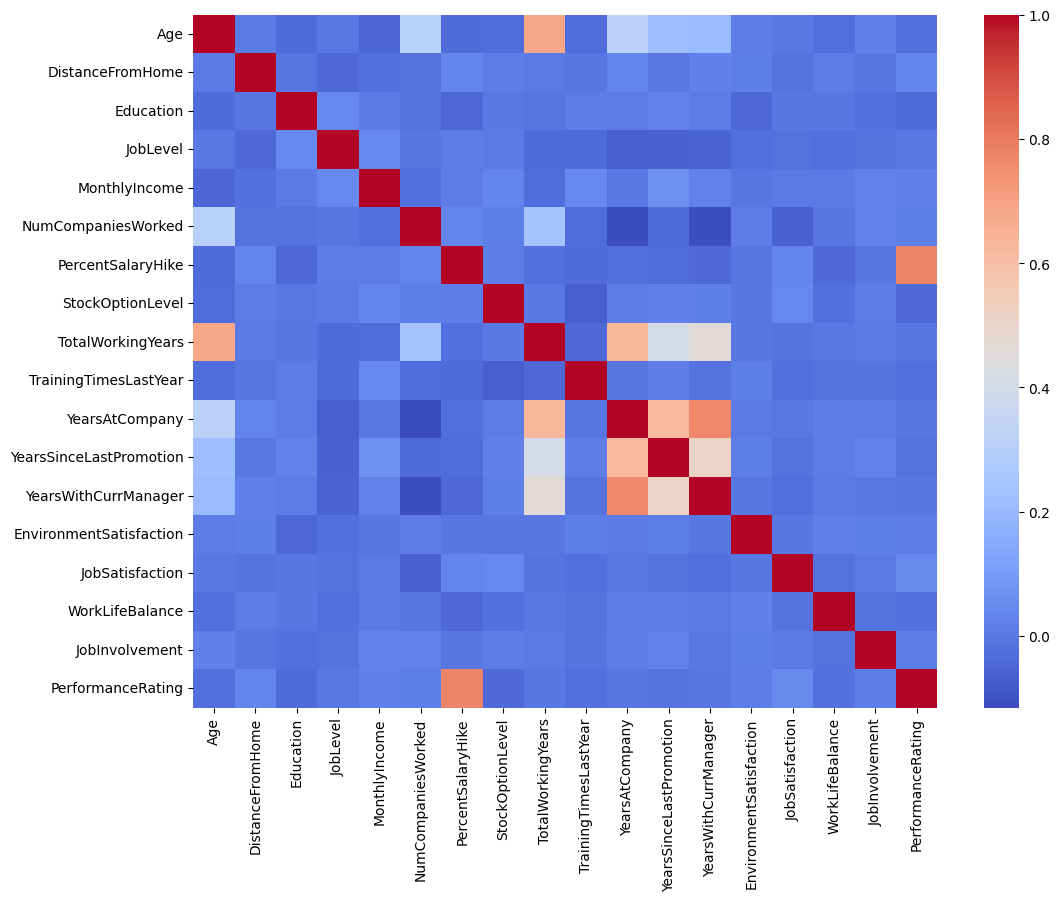

In [16]:
plt.figure(figsize=(12,9))
sns.heatmap(df.drop(['EmployeeCount','StandardHours'], axis=1).corr(), annot=False, cmap='coolwarm')
# exclude total working years, years at company, and percent salary hike due to possible multicollinearity

In [17]:
df = df.drop(['PercentSalaryHike','TotalWorkingYears', 'YearsAtCompany'], axis=1)

In [18]:
df.columns

Index(['Age', 'Attrition', 'BusinessTravel', 'Department', 'DistanceFromHome',
       'Education', 'EducationField', 'EmployeeCount', 'Gender', 'JobLevel',
       'JobRole', 'MaritalStatus', 'MonthlyIncome', 'NumCompaniesWorked',
       'Over18', 'StandardHours', 'StockOptionLevel', 'TrainingTimesLastYear',
       'YearsSinceLastPromotion', 'YearsWithCurrManager',
       'EnvironmentSatisfaction', 'JobSatisfaction', 'WorkLifeBalance',
       'JobInvolvement', 'PerformanceRating'],
      dtype='object')

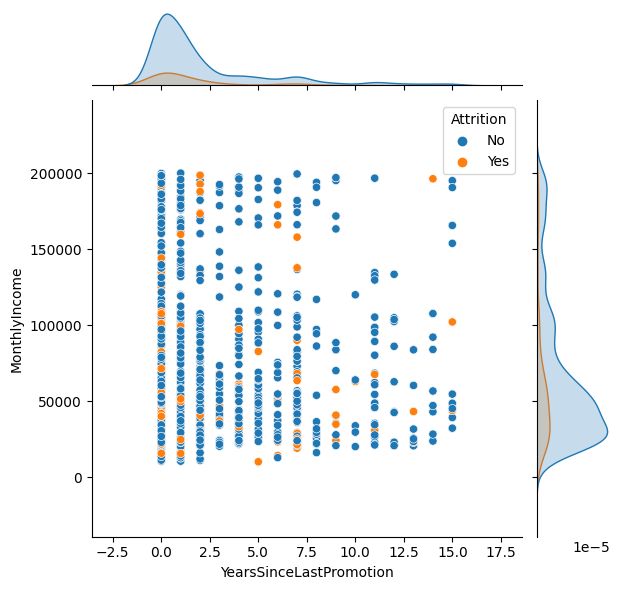

In [23]:
#sns.jointplot(x='DistanceFromHome',y='MonthlyIncome', data=df, hue='Attrition')
sns.jointplot(x='YearsSinceLastPromotion',y='MonthlyIncome', data=df, hue='Attrition')
#sns.jointplot(x='YearsSinceLastPromotion',y='YearsWithCurrManager', data=df, hue='Attrition')

In [24]:
df.columns

Index(['Age', 'Attrition', 'BusinessTravel', 'Department', 'DistanceFromHome',
       'Education', 'EducationField', 'EmployeeCount', 'Gender', 'JobLevel',
       'JobRole', 'MaritalStatus', 'MonthlyIncome', 'NumCompaniesWorked',
       'Over18', 'StandardHours', 'StockOptionLevel', 'TrainingTimesLastYear',
       'YearsSinceLastPromotion', 'YearsWithCurrManager',
       'EnvironmentSatisfaction', 'JobSatisfaction', 'WorkLifeBalance',
       'JobInvolvement', 'PerformanceRating'],
      dtype='object')

<Axes: xlabel='Attrition', ylabel='count'>

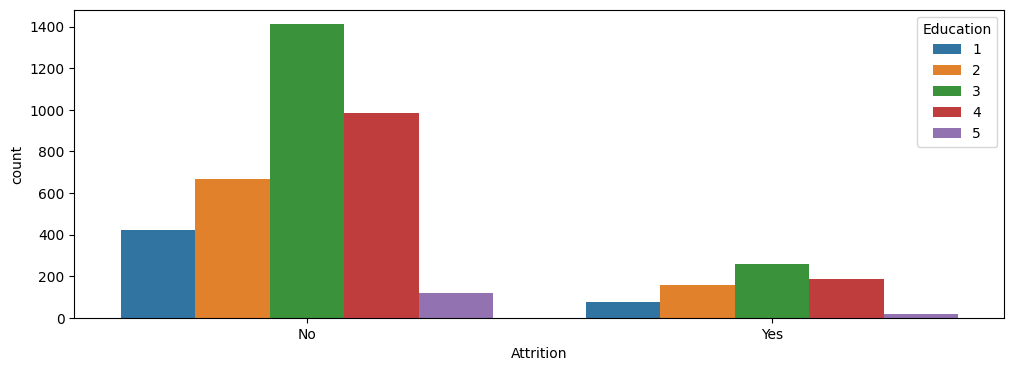

In [25]:
plt.figure(figsize=(12,4))
#sns.countplot(x='Attrition', data=df, hue='BusinessTravel')
#sns.countplot(x='Attrition', data=df, hue='Department')
#sns.countplot(x='DistanceFromHome', data=df, hue='Attrition')
sns.countplot(x='Attrition', data=df, hue='Education')
#sns.countplot(x='Attrition', data=df, hue='EducationField')
#sns.countplot(x='Attrition', data=df, hue='Gender')
#sns.countplot(x='Attrition', data=df, hue='WorkLifeBalance')
#sns.countplot(x='Attrition', data=df, hue='JobSatisfaction') # First one with insights lol
#sns.countplot(x='Attrition', data=df, hue='JobInvolvement') 
#sns.countplot(x='Attrition', data=df, hue='PerformanceRating') 

# From a pure qualitative analysis, I cannot see any striking patterns tbh..

## Logistic Regression for Binary Classification

In [26]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OrdinalEncoder, OneHotEncoder

In [27]:
df.columns

Index(['Age', 'Attrition', 'BusinessTravel', 'Department', 'DistanceFromHome',
       'Education', 'EducationField', 'EmployeeCount', 'Gender', 'JobLevel',
       'JobRole', 'MaritalStatus', 'MonthlyIncome', 'NumCompaniesWorked',
       'Over18', 'StandardHours', 'StockOptionLevel', 'TrainingTimesLastYear',
       'YearsSinceLastPromotion', 'YearsWithCurrManager',
       'EnvironmentSatisfaction', 'JobSatisfaction', 'WorkLifeBalance',
       'JobInvolvement', 'PerformanceRating'],
      dtype='object')

In [28]:
enc = OneHotEncoder(drop='first', sparse=False)

In [29]:
encoded_data = enc.fit_transform(df[['Attrition','Department','EducationField','Gender','JobRole','MaritalStatus','BusinessTravel']])

In [30]:
encoded_df = pd.DataFrame(encoded_data, columns=enc.get_feature_names_out(['Attrition','Department','EducationField','Gender','JobRole','MaritalStatus','BusinessTravel']))

In [31]:
encoded_df

,Attrition_Yes,Department_Research & Development,Department_Sales,EducationField_Life Sciences,EducationField_Marketing,EducationField_Medical,EducationField_Other,EducationField_Technical Degree,Gender_Male,JobRole_Human Resources,...,JobRole_Manager,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,MaritalStatus_Married,MaritalStatus_Single,BusinessTravel_Travel_Frequently,BusinessTravel_Travel_Rarely
0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
1,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0
2,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
3,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
4,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4295,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
4296,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0
4297,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4298,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0


In [32]:
df = df.drop(['Attrition','Department','EducationField','Gender','JobRole','MaritalStatus','BusinessTravel'], axis=1)

In [33]:
df = pd.concat((df.reset_index(),encoded_df), axis=1)

In [34]:
df.columns

Index(['EmployeeID', 'Age', 'DistanceFromHome', 'Education', 'EmployeeCount',
       'JobLevel', 'MonthlyIncome', 'NumCompaniesWorked', 'Over18',
       'StandardHours', 'StockOptionLevel', 'TrainingTimesLastYear',
       'YearsSinceLastPromotion', 'YearsWithCurrManager',
       'EnvironmentSatisfaction', 'JobSatisfaction', 'WorkLifeBalance',
       'JobInvolvement', 'PerformanceRating', 'Attrition_Yes',
       'Department_Research & Development', 'Department_Sales',
       'EducationField_Life Sciences', 'EducationField_Marketing',
       'EducationField_Medical', 'EducationField_Other',
       'EducationField_Technical Degree', 'Gender_Male',
       'JobRole_Human Resources', 'JobRole_Laboratory Technician',
       'JobRole_Manager', 'JobRole_Manufacturing Director',
       'JobRole_Research Director', 'JobRole_Research Scientist',
       'JobRole_Sales Executive', 'JobRole_Sales Representative',
       'MaritalStatus_Married', 'MaritalStatus_Single',
       'BusinessTravel_Travel_Fr

In [35]:
X = df.drop(['EmployeeID','EmployeeCount','Over18','StandardHours','Attrition_Yes'], axis=1)
y = df['Attrition_Yes']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [36]:
from sklearn.preprocessing import StandardScaler
Scaler_X = StandardScaler()
X_train = Scaler_X.fit_transform(X_train)
X_test = Scaler_X.transform(X_test)

In [37]:
m = LogisticRegression()
m.fit(X_train, y_train)
preds = m.predict(X_test)

In [38]:
preds

array([0., 0., 0., ..., 0., 0., 0.])

In [39]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.metrics import roc_curve, auc, roc_auc_score
import matplotlib.pyplot as plt

accuracy = accuracy_score(y_test, preds)
print(f'Accuracy: {accuracy:.2f}')


Accuracy: 0.85


In [40]:
print(classification_report(y_test, preds))

              precision    recall  f1-score   support

         0.0       0.86      0.98      0.91      1081
         1.0       0.60      0.14      0.23       209

    accuracy                           0.85      1290
   macro avg       0.73      0.56      0.57      1290
weighted avg       0.81      0.85      0.80      1290



In [41]:
train_pred = m.predict(X_train)
train_accuracy = accuracy_score(y_train, train_pred)
print(f'Training Accuracy: {train_accuracy:.2f}')
print(f'Test Accuracy: {accuracy:.2f}')
print('no overfit at least')

Training Accuracy: 0.84
Test Accuracy: 0.85
no overfit at least


The model is good at predicting class 0.0 with a high recall of 98%. 

However, it struggles with class 1.0 by achieving only 14% recall.

This indicates that while the model makes few errors in predicting 0.0, it misses a large portion of the 1.0 class, only catching 14% of them.

The model's precision for class 1.0 is 60%. So, when it predicts a sample as 1.0, it's correct 60% of the time.

Given the considerable difference in recall between the two classes and the large support difference, the data might be imbalanced, with a higher representation of class 0.0.

Improvements might be needed, especially if correctly identifying class 1.0 is crucial. Techniques like resampling, using different algorithms, or applying weighted loss functions can be explored.


## Try Random Forest

In [42]:
df.columns

Index(['EmployeeID', 'Age', 'DistanceFromHome', 'Education', 'EmployeeCount',
       'JobLevel', 'MonthlyIncome', 'NumCompaniesWorked', 'Over18',
       'StandardHours', 'StockOptionLevel', 'TrainingTimesLastYear',
       'YearsSinceLastPromotion', 'YearsWithCurrManager',
       'EnvironmentSatisfaction', 'JobSatisfaction', 'WorkLifeBalance',
       'JobInvolvement', 'PerformanceRating', 'Attrition_Yes',
       'Department_Research & Development', 'Department_Sales',
       'EducationField_Life Sciences', 'EducationField_Marketing',
       'EducationField_Medical', 'EducationField_Other',
       'EducationField_Technical Degree', 'Gender_Male',
       'JobRole_Human Resources', 'JobRole_Laboratory Technician',
       'JobRole_Manager', 'JobRole_Manufacturing Director',
       'JobRole_Research Director', 'JobRole_Research Scientist',
       'JobRole_Sales Executive', 'JobRole_Sales Representative',
       'MaritalStatus_Married', 'MaritalStatus_Single',
       'BusinessTravel_Travel_Fr

In [43]:
from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier()
rfc.fit(X_train, y_train)
preds_rfc = rfc.predict(X_test)

In [44]:
preds_rfc

array([0., 1., 0., ..., 0., 0., 0.])

In [45]:
accuracy = accuracy_score(y_test,preds_rfc)
accuracy

0.9844961240310077

In [46]:
print(classification_report(y_test, preds_rfc))

              precision    recall  f1-score   support

         0.0       0.99      1.00      0.99      1081
         1.0       0.97      0.93      0.95       209

    accuracy                           0.98      1290
   macro avg       0.98      0.96      0.97      1290
weighted avg       0.98      0.98      0.98      1290



In [47]:
print('This looks much much better!')

This looks much much better!


In [48]:
train_pred = rfc.predict(X_train)
train_accuracy = accuracy_score(y_train, train_pred)
print(f'Training Accuracy: {train_accuracy:.2f}')
print(f'Test Accuracy: {accuracy:.2f}')

Training Accuracy: 1.00
Test Accuracy: 0.98
